In [1]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import os
print(os.getcwd())

C:\Users\karan.kamat\Documents\Machine Learning\Regression


In [10]:
computer_db = pd.read_csv('computers.csv')

In [12]:
computer_db.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


In [13]:
computer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Units      14 non-null int64
Minutes    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [14]:
computer_db.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [23]:
mean_minutes = computer_db['Minutes'].mean()
median_minutes = computer_db['Minutes'].median()

Text(0,0.5,'Minutes')

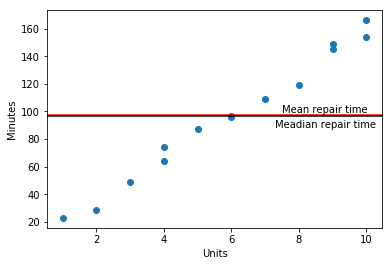

In [54]:
plt.scatter(computer_db['Units'], computer_db['Minutes'])
plt.axhline(y=mean_minutes, c="r")
plt.axhline(y=median_minutes, c='black')
plt.annotate("Mean repair time", xy=(7.5,mean_minutes+2))
plt.annotate('Meadian repair time', xy=(7.3, median_minutes-8))
plt.xlabel("Units")
plt.ylabel("Minutes")

(0.0, 175.0)

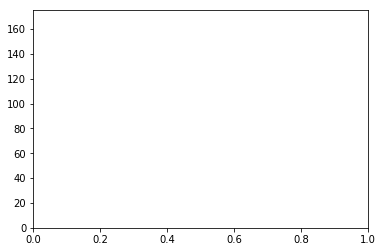

In [44]:
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.ylim(ymin * 50, ymax * 175)

In [77]:
model0 = computer_db['Minutes'].mean()
model1 = 8 + 15*computer_db['Units']
model2 = 10 + 12*computer_db['Units']

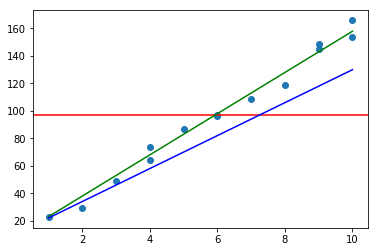

In [78]:
fig, ax = plt.subplots()
ax.scatter(computer_db['Units'], computer_db['Minutes'])

ax.axhline(y=model0, c='r')
ax.plot(computer_db['Units'], model1, c='g')
ax.plot(computer_db['Units'], model2, c='b')

In [83]:
ObvModel0 = pd.DataFrame({'Units': computer_db['Units'],
                         'Actual Time': computer_db['Minutes'],
                         'Predicted Time': computer_db['Minutes'].mean(),
                         'Error': model0 - computer_db['Minutes'] })

In [80]:
ObvModel0

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [89]:
print('Mean Squared Error Model 0: ', sum(ObvModel0['Error']**2))

Mean Squared Error Model 0:  27768.357142857145


In [84]:
ObvModel1 = pd.DataFrame({'Units': computer_db['Units'],
                         'Actual Time': computer_db['Minutes'],
                         'Predicted Time': model1,
                         'Error': model1 - computer_db['Minutes'] })

In [85]:
ObvModel1

,Units,Actual Time,Predicted Time,Error
0,1,23,23,0
1,2,29,38,9
2,3,49,53,4
3,4,64,68,4
4,4,74,68,-6
5,5,87,83,-4
6,6,96,98,2
7,6,97,98,1
8,7,109,113,4
9,8,119,128,9


In [90]:
print('Mean Squared Error Model 1: ', sum(ObvModel1['Error']**2))

Mean Squared Error Model 1:  387


In [87]:
ObvModel2 = pd.DataFrame({'Units': computer_db['Units'],
                         'Actual Time': computer_db['Minutes'],
                         'Predicted Time': model2,
                         'Error': model2 - computer_db['Minutes'] })

In [91]:
print('Mean Squared Error Model 2: ', sum(ObvModel2['Error']**2))

Mean Squared Error Model 2:  4993


In [92]:
x = computer_db.Units
y = computer_db.Minutes

xiyi = x*y
n = len(computer_db)
xmean = computer_db.Units.mean()
ymean = computer_db.Minutes.mean()

In [93]:
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - m*xmean

In [94]:
print('Coefficient:', m, 'Interceptor:', c)

Coefficient: 15.508771929824569 Interceptor: 4.161654135338296


In [95]:
best_fit_model = c + m*computer_db['Units']

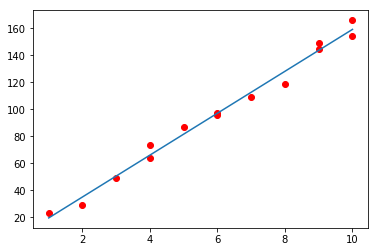

In [98]:
computer_db['best_fit_model'] = best_fit_model
plt.scatter(computer_db.Units, computer_db.Minutes, c='r')
plt.plot(computer_db.Units, computer_db.best_fit_model)

# Best fit model using Linear Regression model from sklearn

In [113]:
type(computer_db[['Units']])

pandas.core.frame.DataFrame

In [114]:
type(computer_db['Units'])

pandas.core.series.Series

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [117]:
X = computer_db[['Units']]
y = computer_db['Minutes']
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.16165413533831
Coefficients: [15.50877193]


# Evaluation of model

SST is the sum of squared differences between actual and mean target values.

SSR is the sum of squared differences between predicted  and mean target values